In [1]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

sns.set()
import os 
os.getcwd()

'C:\\Study\\Data Science\\Machine Learning\\Logistic Regression\\Take Home Assignment - Logistic Regression\\Solution'

1. Create a Dataframe from the given data, perform basic EDA and check if data cleaning is required.

In [4]:
data = pd.read_csv('../xAPI-Edu-Dataset.csv')
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
# Checking Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [6]:
data.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

From above outupt we find there are no null values and 4 features are of int datatypes and rest object data types .

We see that features datatypes are represented correct.

Shape of dataframe is (480,17)

In [7]:
# Checking Statistical Summary
# numerical columns
data.describe()


,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


In [8]:
# Checking Statistical Summary
# object columns
data.describe(include='object').T

,count,unique,top,freq
gender,480,2,M,305
NationalITy,480,14,KW,179
PlaceofBirth,480,14,KuwaIT,180
StageID,480,3,MiddleSchool,248
GradeID,480,10,G-02,147
SectionID,480,3,A,283
Topic,480,12,IT,95
Semester,480,2,F,245
Relation,480,2,Father,283
ParentAnsweringSurvey,480,2,Yes,270


For numerical columns
The summary contains information about the total number of observations,mean,std,var,percentile or quantile information and max and min

For categorical columns
The summary contains information about the total number of observations, number of unique classes, the most occurring class and frequency of the same.

In [9]:
# Checking nulls
data.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

As already mentioned there are no nulls

#### 2. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

<Axes: xlabel='Semester', ylabel='count'>

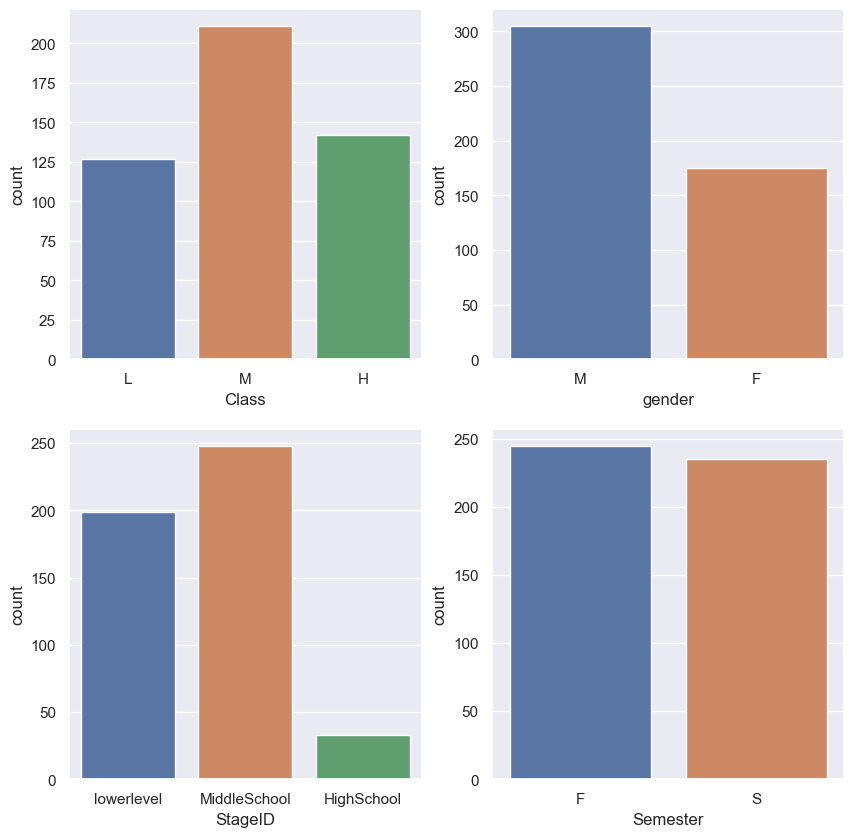

In [10]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Class', data=data, ax=axarr[0,0], order=['L','M','H'])
sns.countplot(x='gender', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='StageID', data=data, ax=axarr[1,0])
sns.countplot(x='Semester', data=data, ax=axarr[1,1])

<Axes: xlabel='NationalITy', ylabel='count'>

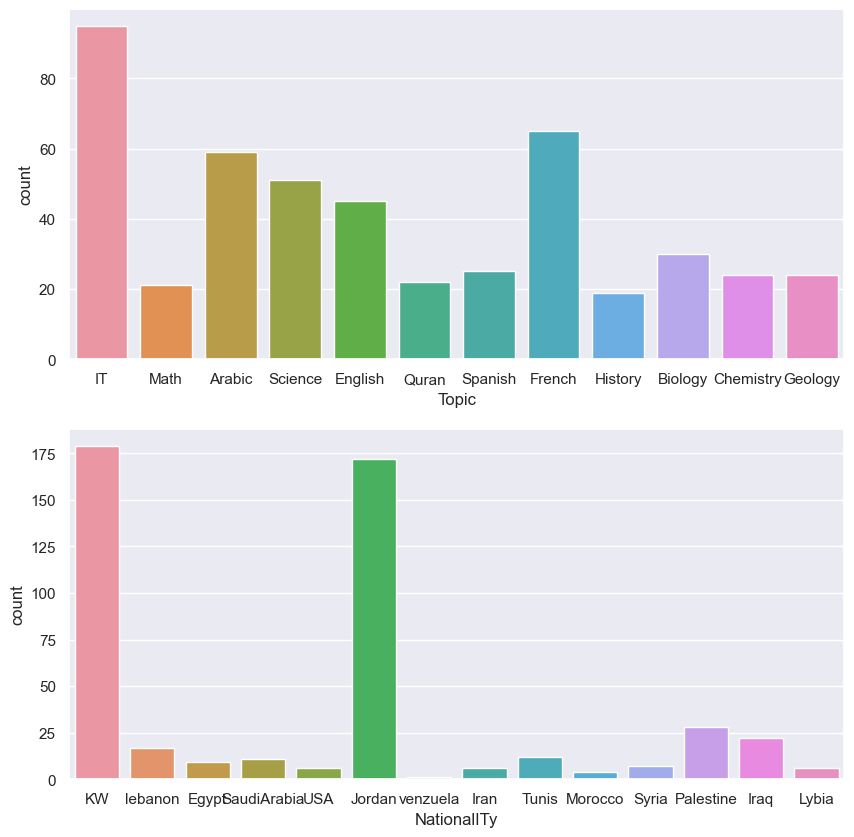

In [11]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', data=data, ax=axis1)
sns.countplot(x='NationalITy', data=data, ax=axis2)

Ans : Most of these countries are in the middle east(Islamic states), perhaps this explains the gender disparity

#### 3. Look at some categorical features in relation to each other, to see what insights could be possibly read?

<Axes: xlabel='gender', ylabel='count'>

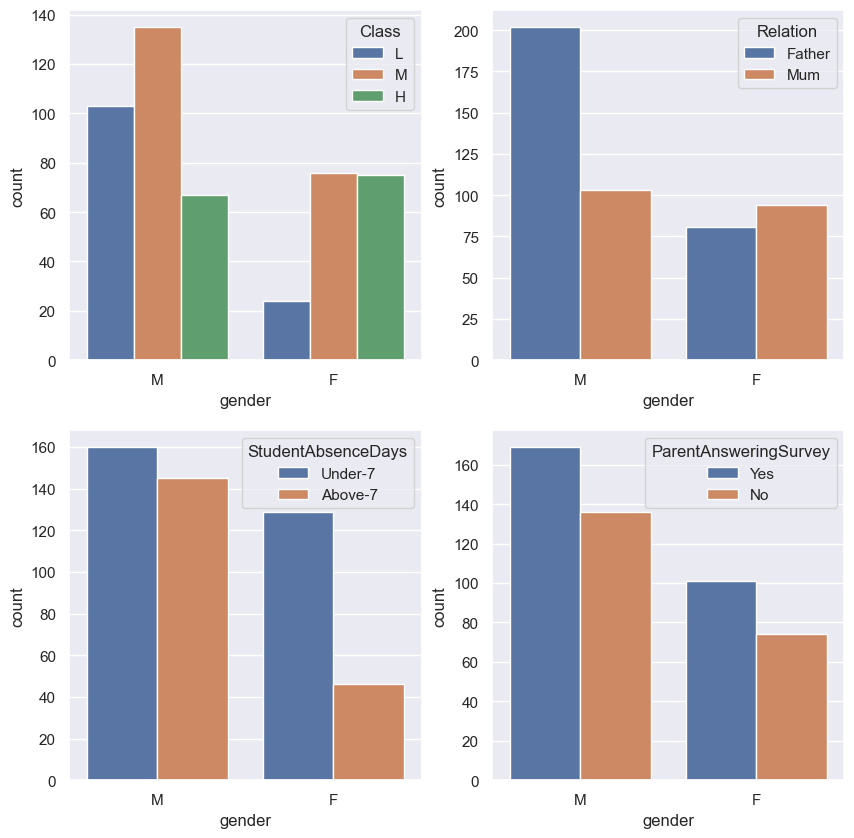

In [12]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='gender', hue='Class', data=data, ax=axarr[0,0], order=['M','F'], hue_order=['L','M','H'])
sns.countplot(x='gender', hue='Relation', data=data, ax=axarr[0,1], order=['M','F'])
sns.countplot(x='gender', hue='StudentAbsenceDays', data=data, ax=axarr[1,0], order=['M','F'])
sns.countplot(x='gender', hue='ParentAnsweringSurvey', data=data, ax=axarr[1,1], order=['M','F'])

<Axes: xlabel='NationalITy', ylabel='count'>

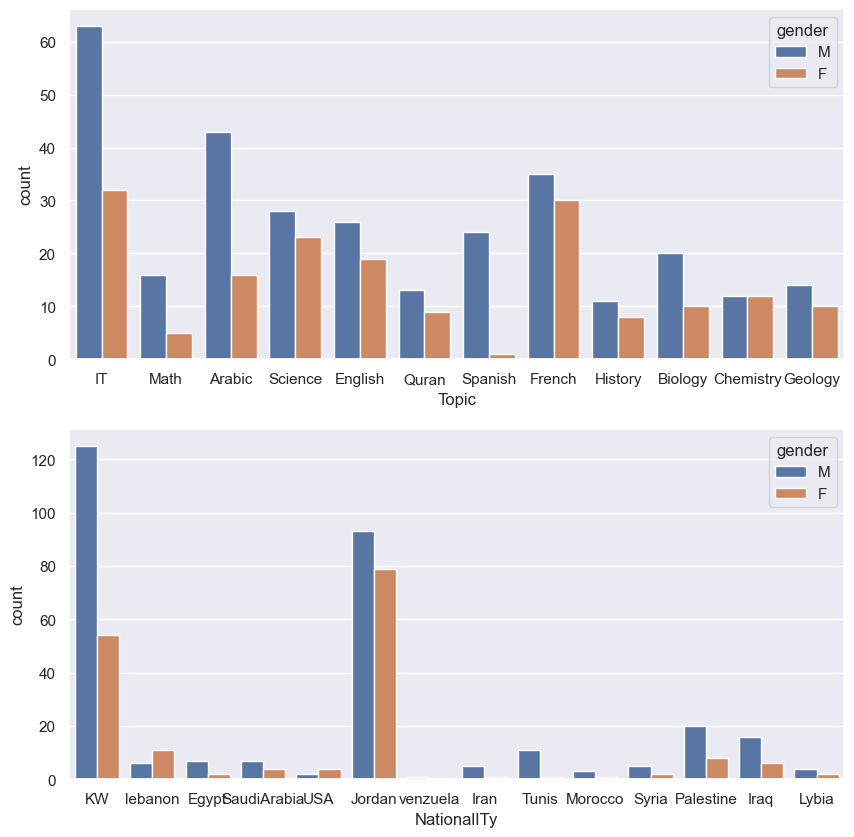

In [13]:
fig, (axis1, axis2)  = plt.subplots(2, 1,figsize=(10,10))
sns.countplot(x='Topic', hue='gender', data=data, ax=axis1)
sns.countplot(x='NationalITy', hue='gender', data=data, ax=axis2)

Ans : 
* Girls seem to have performed better than boys
* In the case of girls, mothers seem to be more interested in their education than fathers
* Girls had much better attendance than boys
* No apparent gender bias when it comes to subject/topic choices, we cannot conclude that girls performed better because they perhaps took less technical subjects
* Gender disparity holds even at a country level. May just be as a result of the sampling


### 4. Visualize categorical variables with numerical variables and give conclusions?

<Axes: xlabel='Class', ylabel='Discussion'>

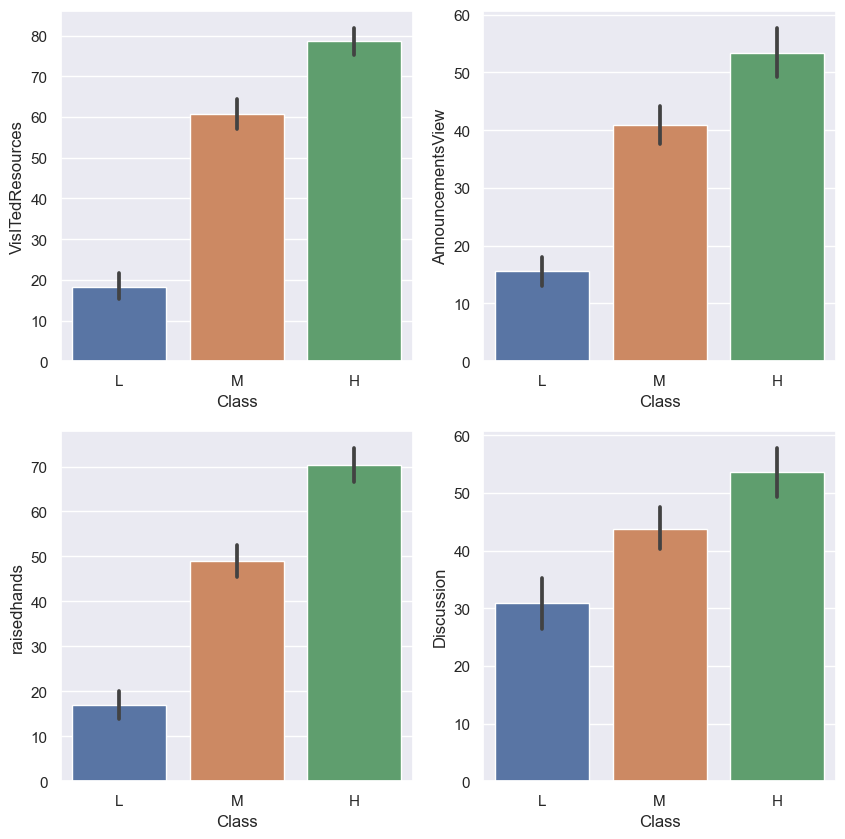

In [14]:
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.barplot(x='Class', y='VisITedResources', data=data, order=['L','M','H'], ax=axarr[0,0])
sns.barplot(x='Class', y='AnnouncementsView', data=data, order=['L','M','H'], ax=axarr[0,1])
sns.barplot(x='Class', y='raisedhands', data=data, order=['L','M','H'], ax=axarr[1,0])
sns.barplot(x='Class', y='Discussion', data=data, order=['L','M','H'], ax=axarr[1,1])

<Axes: xlabel='Semester', ylabel='AnnouncementsView'>

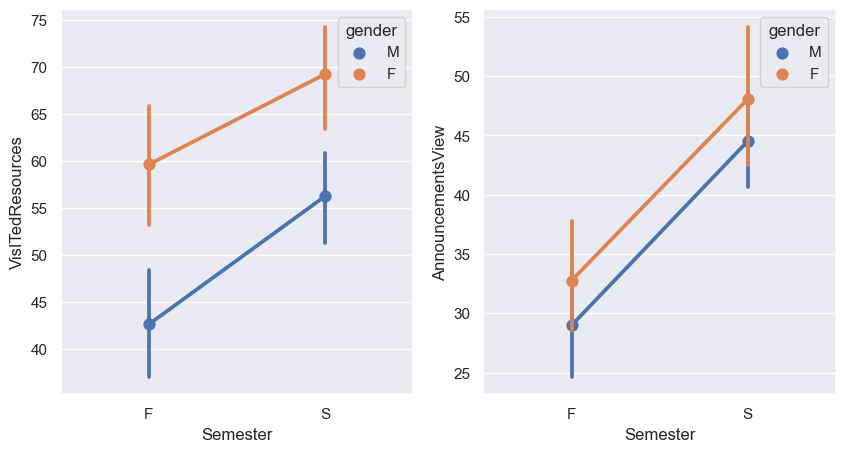

In [15]:
fig, (axis1, axis2)  = plt.subplots(1, 2,figsize=(10,5))
sns.pointplot(x='Semester', y='VisITedResources', hue='gender', data=data, ax=axis1)
sns.pointplot(x='Semester', y='AnnouncementsView', hue='gender', data=data, ax=axis2)

Ans : 
* As expected, those that participated more (higher counts in Discussion, raisedhands, AnnouncementViews, RaisedHands), performed better
* In the case of both visiting resources and viewing announcements, students were more vigilant in the second semester, perhaps that last minute need to boost your final grade

In [16]:
ave_raisedhands = sum(data['raisedhands'])/len(data['raisedhands'])
ave_VisITedResources = sum(data['VisITedResources'])/len(data['VisITedResources'])
ave_AnnouncementsView = sum(data['AnnouncementsView'])/len(data['AnnouncementsView'])
unsuccess = data.loc[(data['raisedhands'] >= ave_raisedhands) & (data['VisITedResources']>=ave_VisITedResources) & (data['AnnouncementsView']>=ave_AnnouncementsView)  & (data['Class'] == 'L')]


In [17]:
unsuccess

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
444,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Mum,75,72,64,39,Yes,Good,Above-7,L
445,M,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Mum,72,76,66,40,Yes,Good,Above-7,L


#### 5. From the above result, what are the factors that leads to get low grades of the students?

Note : Above two students have features ('raisedhands' , 'VisITedResources' , 'AnnouncementsView' ) greater than average

In [18]:
data['numeric_class'] = [1 if data.loc[i,'Class'] == 'L' else 2 if data.loc[i,'Class'] == 'M' else 3 for i in range(len(data))]

In [19]:
grade_male_ave = sum(data[data.gender == 'M'].numeric_class)/float(len(data[data.gender == 'M']))
grade_female_ave = sum(data[data.gender == 'F'].numeric_class)/float(len(data[data.gender == 'F']))


* Gender comparison cannot completely explain low level grades


Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

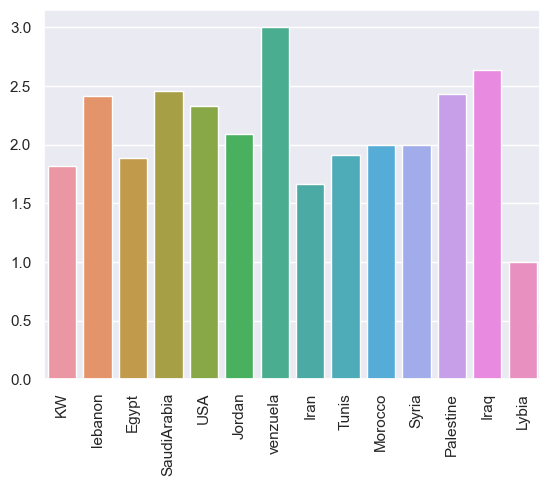

In [20]:
# Now lets look at nationality
nation = data.NationalITy.unique()
nation_grades_ave = [sum(data[data.NationalITy == i].numeric_class)/float(len(data[data.NationalITy == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(data[data.NationalITy == 'Jordan'].numeric_class)/float(len(data[data.NationalITy == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

* As it can be seen in bar plot Jordan is seventh country with average 2.09 so 'Jordan' has positive impact on these two students actually

Text(0.5, 1.0, 'Relation with father or mother affects success of students')

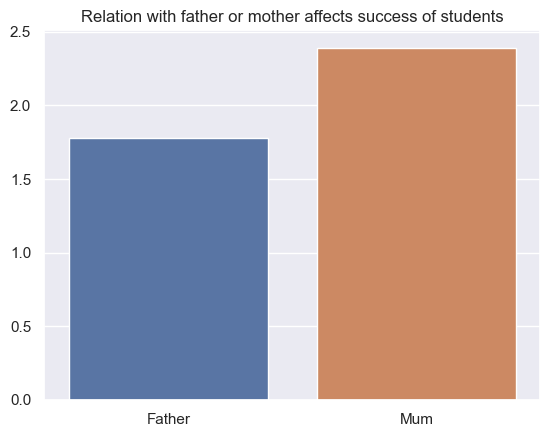

In [21]:
# Lets look at relation with family members
relation = data.Relation.unique()
relation_grade_ave = [sum(data[data.Relation == i].numeric_class)/float(len(data[data.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

* Having relation with mum has positive effect on these students

Text(0.5, 1.0, 'Discussion group participation')

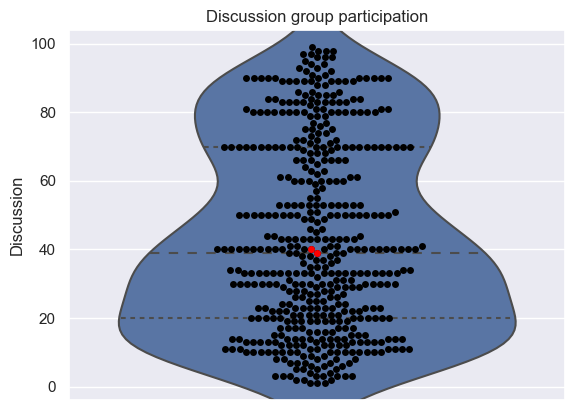

In [22]:
#Lets look at how many times the student participate on discussion groups
discussion = data.Discussion
discussion_ave = sum(discussion)/len(discussion)
ax = sns.violinplot(y=discussion,split=True,inner='quart')
ax = sns.swarmplot(y=discussion,color='black')
ax = sns.swarmplot(y = unsuccess.Discussion, color='red')
plt.title('Discussion group participation')


Text(0.5, 1.0, 'Absence effect on success')

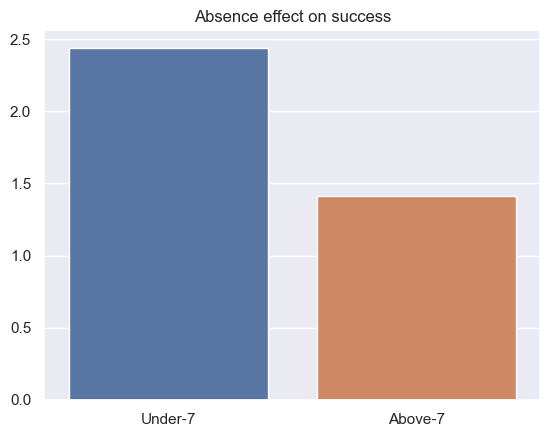

In [23]:
# Now lastly lets look at
absence_day = data.StudentAbsenceDays.unique()
absense_day_ave = [sum(data[data.StudentAbsenceDays == i].numeric_class)/float(len(data[data.StudentAbsenceDays == i])) for i in absence_day]
ax = sns.barplot(x=absence_day, y=absense_day_ave)
plt.title('Absence effect on success')


Ans : 
* These two students are under the average of discussion (43). Therefore, not participating in discussion groups can be important reason to get low grades
* Their absence days are above seven which resulted in low grades

### 6. Build classification model using Logistic Regression and present it's confusion matrix and classification report.


In [52]:
data.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,numeric_class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,2
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,2
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,2


In [51]:
data1 = data.drop('Class',axis = 1)
data_with_dummies = pd.get_dummies(data1, drop_first=True)

In [26]:
data_with_dummies.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,numeric_class,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,2,1,0,0,0,1,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,2,1,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [27]:
Features = data_with_dummies.drop(['numeric_class'],axis = 1)
Target = data_with_dummies['numeric_class']


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(Features)
Features

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.model_selection import train_test_split

X = scaler.fit_transform(Features)

array([[-1.03342931, -1.17407456, -1.35116659, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [-0.87081258, -1.05302945, -1.31354928, ...,  0.8819171 ,
         0.80239368,  0.81295735],
       [-1.19604604, -1.44642607, -1.4264012 , ..., -1.13389342,
        -1.24627103, -1.23007683],
       ...,
       [ 0.26750452,  0.58107959, -0.48596856, ..., -1.13389342,
        -1.24627103,  0.81295735],
       [-0.54557912, -1.14381328, -0.89975892, ..., -1.13389342,
        -1.24627103, -1.23007683],
       [-0.3829624 , -1.23459712, -0.56120318, ..., -1.13389342,
        -1.24627103, -1.23007683]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Target, test_size=0.3, random_state=45)


In [31]:
from sklearn.linear_model import LogisticRegression

Logit_Model = LogisticRegression()
Logit_Model.fit(X_train,y_train)

LogisticRegression()

In [32]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,classification_report

y_pred = Logit_Model.predict(X_test)
#y_pred_prob= Logit_Model.predict_proba(X_test)[:,1]
cfm=confusion_matrix(y_test,y_pred)
Score = accuracy_score(y_test,y_pred)
Report = classification_report(y_test,y_pred)

In [35]:
print(Report)
print(cfm)

              precision    recall  f1-score   support

           1       0.76      0.87      0.81        30
           2       0.78      0.70      0.74        74
           3       0.65      0.70      0.67        40

    accuracy                           0.74       144
   macro avg       0.73      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144

[[26  3  1]
 [ 8 52 14]
 [ 0 12 28]]


In [36]:
Target.value_counts()

2    211
3    142
1    127
Name: numeric_class, dtype: int64

### 7. Justify the model. Tune the model using various techniques, if need be.

1.RFE

In [48]:
#sklearn.feature_selection.RFE(estimator, *, n_features_to_select=None, step=1, verbose=0, importance_getter='auto')
#
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression()
rfe = RFE(estimator=logreg,n_features_to_select=None, step=1, verbose=0,
                              importance_getter='auto')
rfe = rfe.fit(Features, Target)

In [45]:
selected_features=Features.columns[rfe.support_]
X_rfe = Features[selected_features]


In [39]:
# Model building with RFE
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_rfe,Target, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_rfe = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_rfe.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)

[[25 14  0]
 [10 53  7]
 [ 1 12 22]]
              precision    recall  f1-score   support

           1       0.69      0.64      0.67        39
           2       0.67      0.76      0.71        70
           3       0.76      0.63      0.69        35

    accuracy                           0.69       144
   macro avg       0.71      0.68      0.69       144
weighted avg       0.70      0.69      0.69       144


#### SelectKBest Method

In [40]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_new = SelectKBest(chi2, k=30).fit_transform(Features, Target)

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_new, Target, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_Kbest = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_Kbest.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)
Features

[[30  9  0]
 [ 5 54 11]
 [ 0  9 26]]
              precision    recall  f1-score   support

           1       0.86      0.77      0.81        39
           2       0.75      0.77      0.76        70
           3       0.70      0.74      0.72        35

    accuracy                           0.76       144
   macro avg       0.77      0.76      0.76       144
weighted avg       0.77      0.76      0.76       144


,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Good,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
1,20,20,3,25,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,1
2,10,7,0,30,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
476,50,77,14,28,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
478,30,17,14,57,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Variance Threshold

In [41]:
from sklearn.feature_selection import VarianceThreshold
import numpy as np 

var = VarianceThreshold(threshold=0.025)
X_trans = var.fit_transform(Features)

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X_trans,Target, test_size = 0.30, random_state = 10)

clf = LogisticRegression()
# fit the model on scaled training data
logreg_with_var_thresh = clf.fit(X_train, y_train)

# use predict() to predict the class labels of target variable
y_pred = logreg_with_var_thresh.predict(X_test)

cfm=confusion_matrix(y_test,y_pred)
print(cfm)
Report = classification_report(y_test,y_pred)
print(Report)

[[31  8  0]
 [ 5 54 11]
 [ 0  9 26]]
              precision    recall  f1-score   support

           1       0.86      0.79      0.83        39
           2       0.76      0.77      0.77        70
           3       0.70      0.74      0.72        35

    accuracy                           0.77       144
   macro avg       0.77      0.77      0.77       144
weighted avg       0.77      0.77      0.77       144


So we can conclude that by variance thresholding techniques we are getting better model 